Q] Build a prediction model for Salary_hike

In [13]:
#importing libraries & reading data  
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skewnorm
from scipy.stats import norm
import statsmodels.formula.api as smf

In [14]:
data = pd.read_csv(r"C:\Users\neetac1973\Downloads\Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [15]:
# EDA
data.head()  # gives first 5 rows of table

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [16]:
data.info()  # gives information about column header, null values and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [17]:
data.shape   # gives no. of rows and columns

(30, 2)

In [18]:
data.describe()   # gives count,mean,sd,min-max,25%-50%-75% quantile range

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [19]:
#Correlation Analysis
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


The correlation of YearsExperience with Salary is 0.978242.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

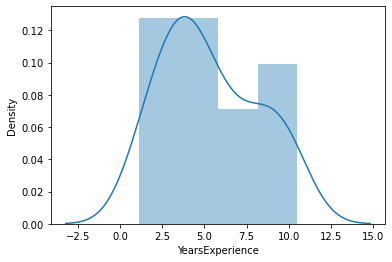

In [20]:
#Data Visualization
sns.distplot(data['YearsExperience'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience'>

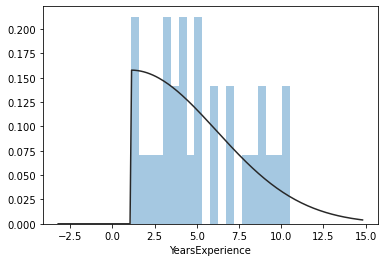

In [21]:
sns.distplot(data['YearsExperience'], fit=skewnorm, bins=20, kde=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

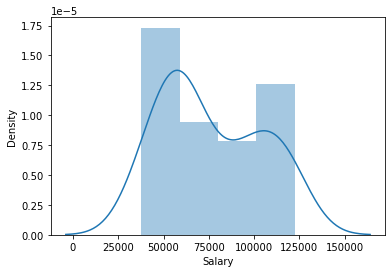

In [22]:
sns.distplot(data['Salary'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

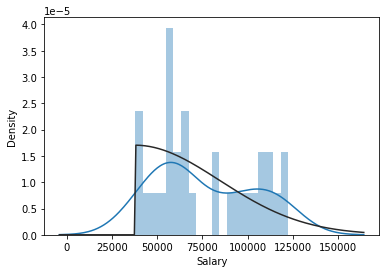

In [23]:
sns.distplot(data['Salary'], fit=skewnorm, bins=20, kde=True)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

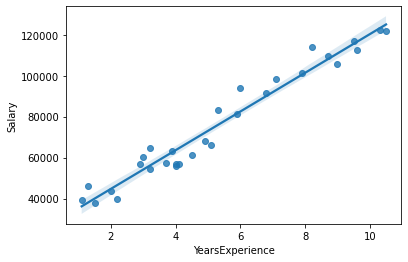

In [25]:
#Fitting a Linear Regression Model

model = smf.ols("Salary~YearsExperience",data = data).fit()

sns.regplot(x="YearsExperience", y="Salary", data=data)

In [26]:
# Model Testing
# Finding Coefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [30]:
# Finding pvalue and tvalue
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [28]:
# Finding rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [33]:
#Prediction for new data point
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [34]:
# Automatic Prediction for say 3 & 5 Years Experience 
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [35]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [37]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

In [39]:
#Simple model without any transformation

# Input data
X = data['YearsExperience'].values.reshape(-1,1)

print(X)

# Output or Predicted Value of data
y = data['Salary'].values.reshape(-1,1)
#print(log(y))

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)

predict_reg = LinearRegression()

#Train the Model using linear Regression
predict_reg.fit(X_train, y_train)

LinearRegression()

In [42]:
print(" Intercept value of Model is " ,predict_reg.intercept_)
print("Coefficient value of Model is ", predict_reg.coef_)

 Intercept value of Model is  [25321.58301178]
Coefficient value of Model is  [[9423.81532303]]


In [43]:
y_pred = predict_reg.predict(X_test)

pmsh_pf = pd.DataFrame({'Actual':y_test.flatten(), 'Predict': y_pred.flatten()})
pmsh_pf

,Actual,Predict
0,112635.0,115790.210113
1,67938.0,71498.278095
2,113812.0,102596.868661
3,83088.0,75267.804224
4,64445.0,55477.792045
5,57189.0,60189.699707


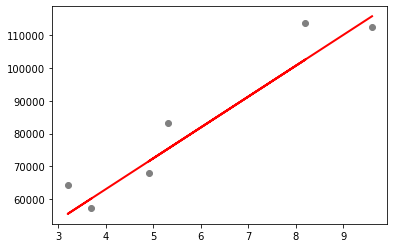

In [44]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [45]:
#Calculate Error Rate of the model.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2 Score :          ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 6286.453830757749
Mean Squared Error: 49830096.85590839
Root Mean Squared Error: 7059.04362190151
R^2 Score :           0.9024461774180497


    Conclusion
WE have found that while transforming the model, we got various values for MAE, RMSE, MSE and R 2 Values. Summery of the following Models

#Simple linear Regression Model
Mean Absolute Error: 6286.453830757749
Mean Squared Error: 49830096.85590839
Root Mean Squared Error: 7059.04362190151
R^2 Score :           0.9024461774180497

#Logrithm Transformation Model
Mean Absolute Error: 7714.638101223965
Mean Squared Error: 84567607.74831854
Root Mean Squared Error: 9196.064796874723
R^2 Score :           0.8344395471211845

#Exponential Transformation Model
Mean Absolute Error: 0.09314373254401727
Mean Squared Error: 0.013430075287585596
Root Mean Squared Error: 0.11588820167551828
R^2 Score :           0.8120949075482874